In [1]:
%load_ext autoreload
%autoreload 2
import itertools
import math
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms
import py_rdl
import RA

In [2]:
data = pd.read_csv("data/cyclic_peptide_2.csv")
phi_psi = pd.read_csv("data/phi-psi.csv")

In [3]:
tttt = []
tttc = []
ttcc = []
tctc = []
tccc = []
cccc = []
for idx, item in enumerate(data[["P1","P2","P3","P4"]].values):
    if item.tolist()==["T","T","T","T"]:
        tttt.append(idx)
    elif item.tolist() in [["T","T","T","C"],["T","T","C","T"],["T","C","T","T"],["C","T","T","T"]]:
        tttc.append(idx)
    elif item.tolist() in [["T","T","C","C"],["T","C","C","T"],["C","C","T","T"]]:
        ttcc.append(idx)
    elif item.tolist() in [["T","C","T","C"],["C","T","C","T"]]:
        tctc.append(idx)
    elif item.tolist() in [["C","C","C","T"],["C","C","T","C"],["C","T","C","C"],["T","C","C","C"]]:
        tccc.append(idx)
    else:
        cccc.append(idx)

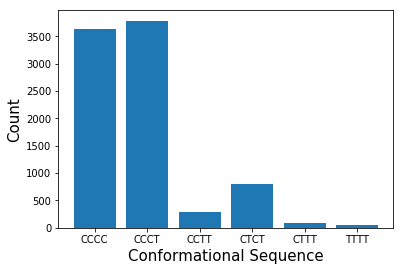

In [8]:
seq = ["CCCC","CCCT","CCTT","CTCT","CTTT","TTTT"]
count = [len(cccc),len(tccc),len(ttcc), len(tctc), len(tttc), len(tttt)]
plt.bar(seq,count)
plt.xlabel("Conformational Sequence",size=15)
plt.ylabel("Count",size=15)
plt.savefig("seq_count.pdf",dpi=150,bbox_inches="tight")
plt.show()

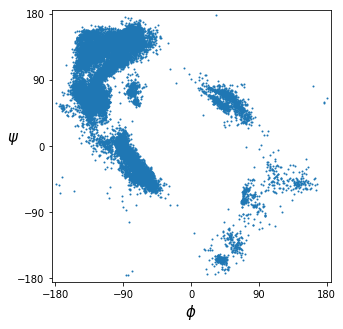

In [9]:
phi_psi_transform = phi_psi.values.reshape(8661*4,2)
aminoacid = data[["AA1","AA2","AA3","AA4"]].values.reshape(8661*4)
keep_phi_psi = []
for i, item in enumerate(aminoacid):
    if item!="G":
        keep_phi_psi.append(phi_psi_transform[i])  # exclude Gly phi-psi angle
phi_psi_frame = pd.DataFrame(keep_phi_psi)
plt.figure(figsize=(5,5))
plt.scatter(phi_psi_frame.iloc[:,1],phi_psi_frame.iloc[:,0],s=1)
plt.xlim(-185,185)
plt.xticks([-180,-90,0,90,180])
plt.ylim(-185,185)
plt.yticks([-180,-90,0,90,180])
plt.xlabel(r"$\phi$",size=15)
plt.ylabel(r"$\psi$",size=15,rotation=0)
plt.savefig("ctps.pdf",bbox_inches="tight",dpi=150)
plt.show()

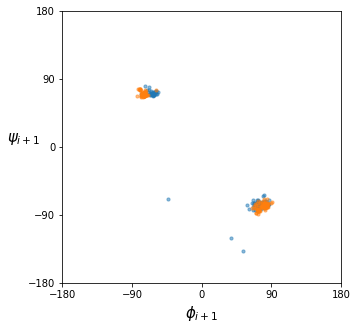

In [2]:
# Phi-Psi (Gamma Turns)
tttc_phi_psi = pd.read_csv("tttc_phi_psi.csv")
tttt_phi_psi = pd.read_csv("tttt_phi_psi.csv")

plt.figure(figsize=(5,5))
plt.scatter(tttc_phi_psi.iloc[:,0],tttc_phi_psi.iloc[:,1],label="TTTC",
            s=10,alpha=0.5)
plt.scatter(tttt_phi_psi.iloc[:,0],tttt_phi_psi.iloc[:,1],label="TTTT",
            s=10,alpha=0.5)
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([-180,-90,0,90,180])
plt.yticks([-180,-90,0,90,180])
plt.xlabel(r"$\phi_{i+1}$",size=15)
plt.ylabel(r"$\psi_{i+1}$",size=15, rotation=0)
plt.savefig("gamma-turns-phi-psi.pdf",dpi=150, bbox_inches="tight")
plt.show()

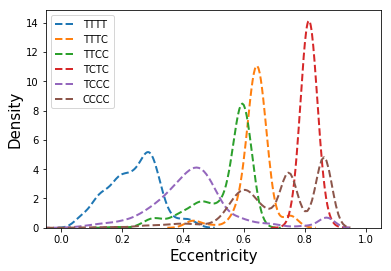

In [13]:
sns.kdeplot(data["Eccentricity"].iloc[tttt],bw=0.025,label="TTTT",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tttc],bw=0.025,label="TTTC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[ttcc],bw=0.025,label="TTCC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tctc],bw=0.025,label="TCTC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tccc],bw=0.025,label="TCCC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[cccc],bw=0.025,label="CCCC",ls="--",lw=2)
plt.xlim(-0.05,1.05)
plt.ylabel("Density",size=15)
plt.xlabel("Eccentricity",size=15)
plt.savefig("eccentricity.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [96]:
# Pseudorotation
cccc_frame = data.iloc[cccc,:]
ccct_frame = data.iloc[tccc,:]
tctc_frame = data.iloc[tctc,:]
ttcc_frame = data.iloc[ttcc,:]
tttc_frame = data.iloc[tttc,:]
tttt_frame = data.iloc[tttt,:]

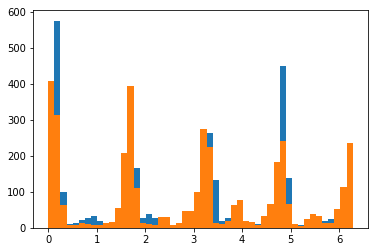

In [31]:
plt.hist(np.mod(ccct_frame["phi2"]-ccct_frame["phi3"],2*np.pi),bins=50)
plt.hist(np.mod(ccct_frame["phi2"]+ccct_frame["phi3"],2*np.pi),bins=50)
plt.show()

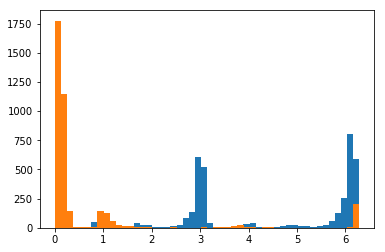

In [91]:
plt.hist(np.mod(ccct_frame["phi3"]-ccct_frame["phi5"],2*np.pi),bins=50)
plt.hist(np.mod(ccct_frame["phi3"]+ccct_frame["phi5"],2*np.pi),bins=50)
plt.show()

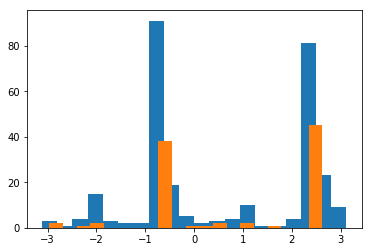

In [86]:
#plt.hist(cccc_frame["phi2"],bins=50)
#plt.hist(ccct_frame["phi2"],bins=50)
#plt.hist(tctc_frame["phi2"],bins=50)
plt.hist(ttcc_frame["phi2"],bins=20)
plt.hist(tttc_frame["phi2"],bins=20)
plt.show()

In [92]:
sns.pairplot(cctt_frame[["phi2","phi3","phi4","phi5"]],plot_kws=dict(s=10))

NameError: name 'cctt_frame' is not defined

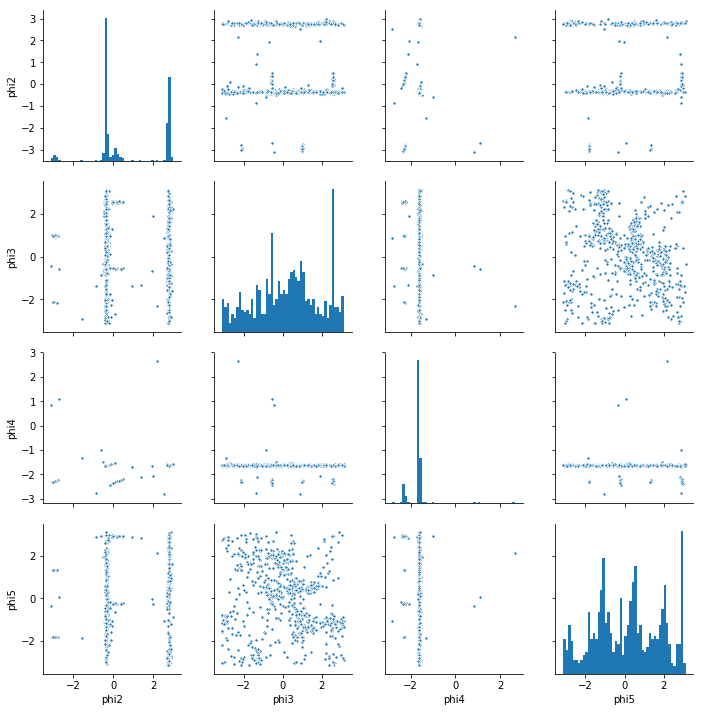

In [124]:
sns.pairplot(tctc_frame[["phi2","phi3","phi4","phi5"]],plot_kws=dict(s=10),diag_kws=dict(bins=50))

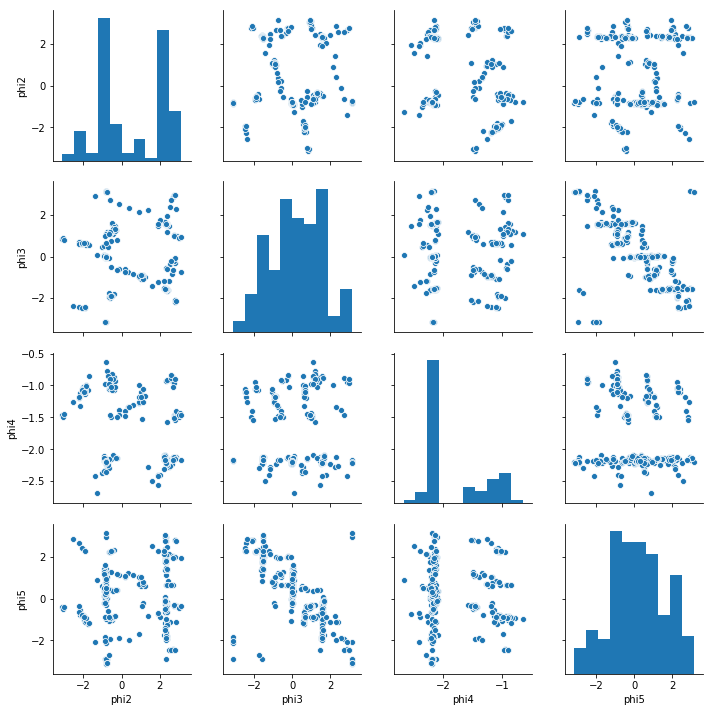

In [101]:
sns.pairplot(ttcc_frame[["phi2","phi3","phi4","phi5"]])

In [100]:
len(ttcc)

283

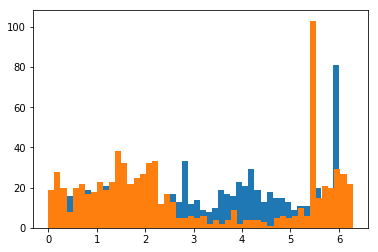

In [50]:
plt.hist(np.mod(tctc_frame["phi3"]-tctc_frame["phi5"],2*np.pi),bins=50)
plt.hist(np.mod(tctc_frame["phi3"]+tctc_frame["phi5"],2*np.pi),bins=50)
plt.show()

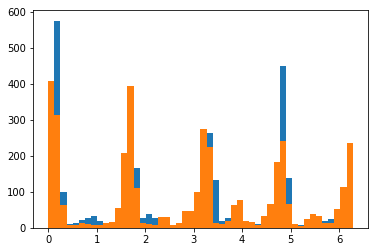

In [35]:
plt.hist(np.mod(ccct_frame["phi2"]-ccct_frame["phi3"],2*np.pi),bins=50)
plt.hist(np.mod(ccct_frame["phi2"]+ccct_frame["phi3"],2*np.pi),bins=50)
plt.show()

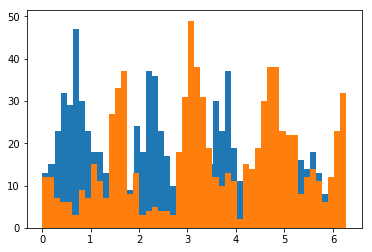

In [36]:
plt.hist(np.mod(tctc_frame["phi2"]-tctc_frame["phi5"],2*np.pi),bins=50)
plt.hist(np.mod(tctc_frame["phi2"]+tctc_frame["phi5"],2*np.pi),bins=50)
plt.show()

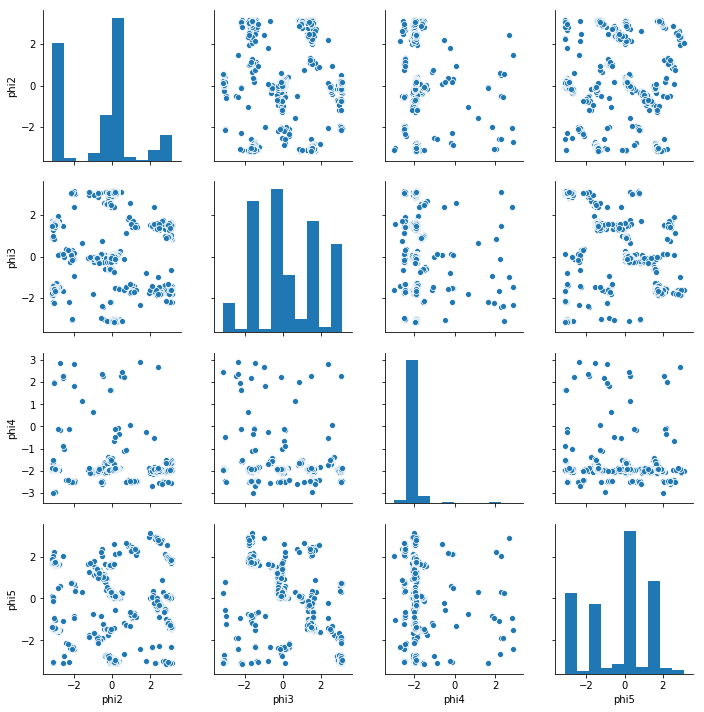

In [14]:
sns.pairplot(ccct_frame[["phi2","phi3","phi4","phi5"]])

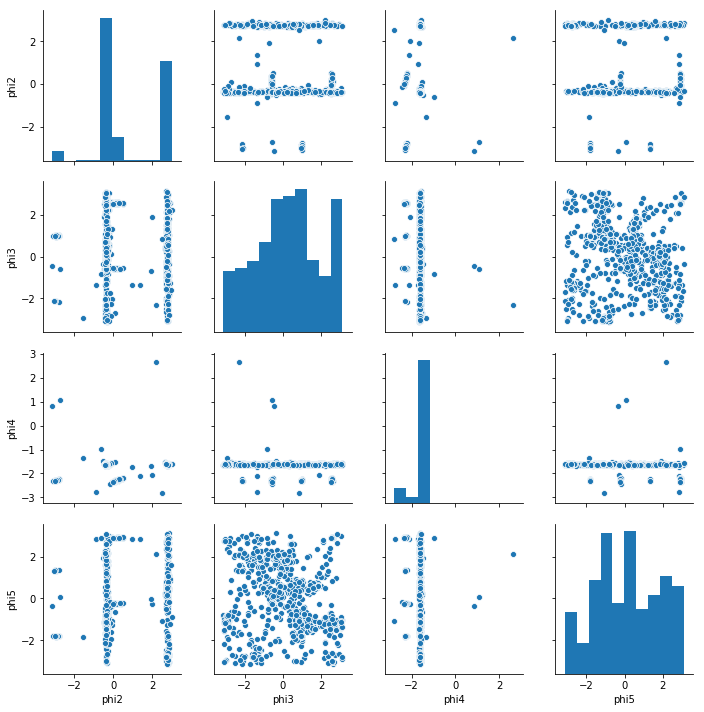

In [12]:
sns.pairplot(tctc_frame[["phi2","phi3","phi4","phi5"]])

In [13]:
# Side Chain distribution
chi1 = pd.read_csv("data/chi1.csv")

In [92]:
data = pd.DataFrame({"Chi1":a,"AA":b})

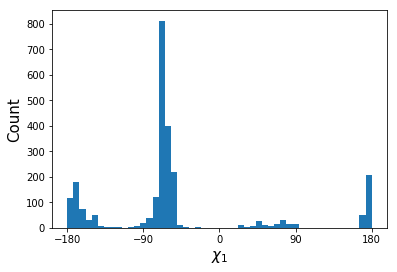

In [133]:
plt.hist(data[data["AA"]=="L"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("L_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

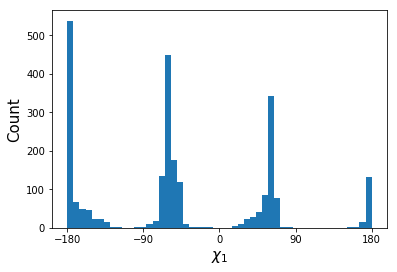

In [129]:
plt.hist(data[data["AA"]=="F"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("F_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

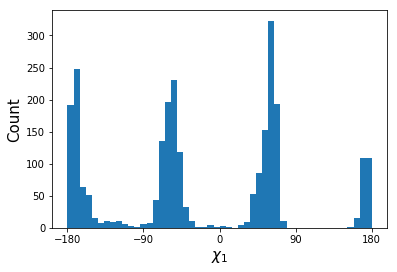

In [130]:
plt.hist(data[data["AA"]=="W"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("W_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

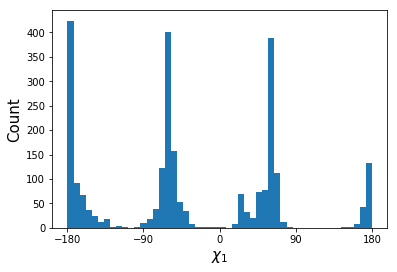

In [131]:
plt.hist(data[data["AA"]=="Y"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("Y_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

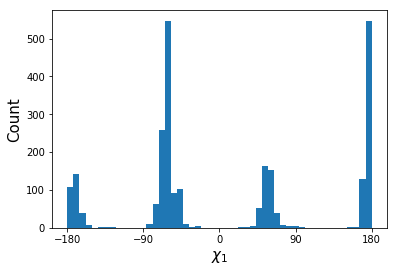

In [126]:
plt.hist(data[data["AA"]=="V"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("V_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

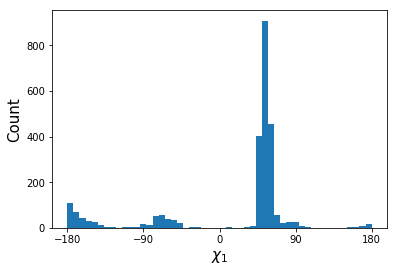

In [125]:
plt.hist(data[data["AA"]=="S"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("S_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

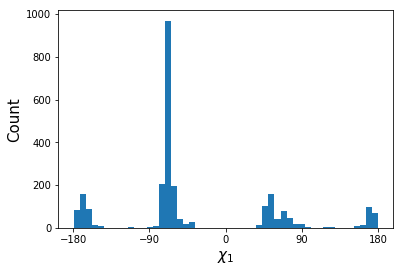

In [124]:
plt.hist(data[data["AA"]=="T"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("T_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

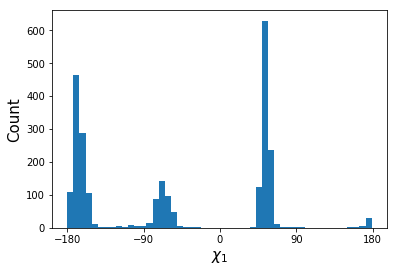

In [123]:
plt.hist(data[data["AA"]=="C"]["Chi1"],bins=50)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("C_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

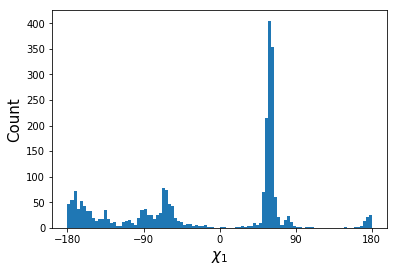

In [122]:
plt.hist(data[data["AA"]=="H"]["Chi1"],bins=100)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("H_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

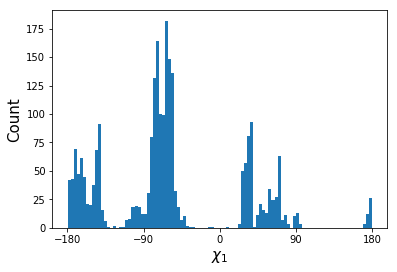

In [119]:
plt.hist(data[data["AA"]=="K"]["Chi1"],bins=100)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("K_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

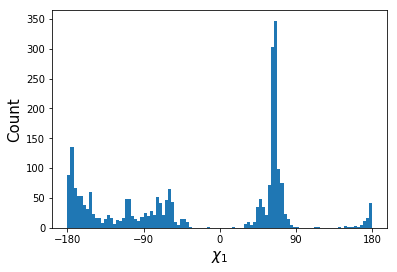

In [120]:
plt.hist(data[data["AA"]=="D"]["Chi1"],bins=100)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("D_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

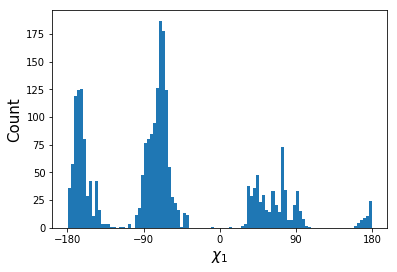

In [121]:
plt.hist(data[data["AA"]=="E"]["Chi1"],bins=100)
plt.xticks([-180,-90,0,90,180])
plt.xlabel(r"$\chi_{1}$",size=15)
plt.ylabel("Count",size=15)
plt.savefig("E_chi1.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [ ]:
CCCC,TTCC
TTTT,TCCC
TCTC,TTTC

In [67]:
t = chi1.iloc[tccc,:].values.reshape(-1)
t0 = phi_psi.iloc[tccc,[1,3,5,7]]
t2 = t0.values.reshape(-1)
w = data.iloc[tccc,:4].values.reshape(-1)

In [68]:
tmp = pd.DataFrame({"w":w,"t":t,"q":t2})